In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)

from sklearn import svm

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/Sreemanto/DSP-55/main/Muffins_Cuppcakes.csv')
df = df.iloc[:, 1:]
df

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


C:\Users\ganesh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


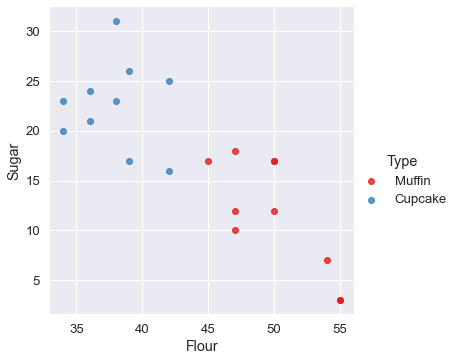

In [17]:
#plot tow ingredients

sns.lmplot('Flour','Sugar', data=df, hue='Type', palette='Set1',fit_reg=False)

In [18]:
#specify inputs for the model
ingredients = df[['Flour','Sugar']]

#converting the columns for text to 0,1
type_label = np.where(df['Type']=='Muffin',0 ,1)

In [20]:
#Fit the svm model

model = svm.SVC(kernel='linear')  #SVC : support vector classifier
model.fit(ingredients, type_label)
model.coef_

array([[-6.66503014e-01, -7.77156117e-16]])

In [24]:
model.intercept_[0]

28.992962922374236

In [26]:
model.support_vectors_

array([[45., 17.],
       [42., 16.],
       [42., 25.]])

C:\Users\ganesh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


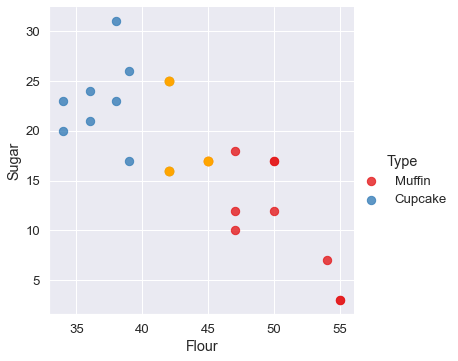

In [28]:
#look at the margins and support vectors

sns.lmplot('Flour','Sugar', data=df, hue='Type', palette= 'Set1', fit_reg=False, scatter_kws={'s':70})

plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:, 1], s = 80, facecolors = 'orange')

#orange dots are the support vectors

In [32]:
#create a function to guess when a recipe is a muffin or cupcake

def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]])) == 0:
        print("You're looking at a muffinc recipe!")
    else: print("You're looking at cupcake recipe!")

In [33]:
#predict if 35 parts flour and 10 parts sugar
muffin_or_cupcake(35,10)

You're looking at cupcake recipe!
